In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def get_code(n):
    for x,y in code.items():
        if n==y:
            return x
img_size = (150,150)

In [4]:
def load_data():
    datasets = ['/kaggle/input/intel-image-classification/seg_train/seg_train', '/kaggle/input/intel-image-classification/seg_test/seg_test']
    output = []

    for dataset in datasets:
        images = []
        labels = []

        for folder in os.listdir(dataset):
            label = code[folder]
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, img_size)
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

100%|██████████| 553/553 [00:05<00:00, 99.38it/s] 


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [8]:
from collections import Counter
print("Train class distribution:", Counter(train_labels))
print("Test class distribution:", Counter(test_labels))

Train class distribution: Counter({3: 2512, 2: 2404, 5: 2382, 4: 2274, 1: 2271, 0: 2191})
Test class distribution: Counter({2: 553, 3: 525, 4: 510, 5: 501, 1: 474, 0: 437})


In [8]:
KerasModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

KerasModel.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746553966.108817      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,0

 Total params: 324,390 (1.24 MB)

 Trainable params: 322,982 (1.23 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
KerasModel.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_save_path = '/kaggle/working/best_model.keras'

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    model_save_path,
    monitor='val_loss',  
    save_best_only=True,
    mode='min', 
    verbose=1  
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    #verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    #min_lr=1e-6,
    #verbose=1
)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

history = KerasModel.fit(
    datagen.flow(train_images, train_labels, batch_size = 32),
    epochs=100,
    validation_data=(test_images, test_labels),                
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746553980.615002      93 service.cc:148] XLA service 0x7da1ac089690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746553980.615705      93 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746553981.299589      93 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/439 ━━━━━━━━━━━━━━━━━━━━ 1:52:02 15s/step - accuracy: 0.0938 - loss: 2.8571

I0000 00:00:1746553988.069873      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/439 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4700 - loss: 1.5317
Epoch 1: val_loss improved from inf to 1.44404, saving model to /kaggle/working/best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 166ms/step - accuracy: 0.4703 - loss: 1.5306 - val_accuracy: 0.5157 - val_loss: 1.4440 - learning_rate: 0.0010
Epoch 2/100
438/439 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6579 - loss: 0.9112
Epoch 2: val_loss improved from 1.44404 to 0.70414, saving model to /kaggle/working/best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.6580 - loss: 0.9109 - val_accuracy: 0.7200 - val_loss: 0.7041 - learning_rate: 0.0010
Epoch 3/100
438/439 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7345 - loss: 0.7162
Epoch 3: val_loss did not improve from 0.70414
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 142ms/step - accuracy: 0.7345 - loss: 0.7161 - val_accuracy: 0.7230 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 4/100
438/439 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0

In [13]:
loss,accuracy=KerasModel.evaluate(test_images,test_labels)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8676 - loss: 0.3650


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8999 - loss: 0.2664

In [14]:
print(f'loss is {loss}')
print(f'accuracy is {accuracy}')

loss is 0.30979228019714355
accuracy is 0.8926666378974915


loss is 0.2719274163246155
accuracy is 0.8989999890327454

In [15]:
import glob as gb
img_path = "/kaggle/input/intel-image-classification/seg_pred/seg_pred"
x_pred = []
images = gb.glob(pathname=os.path.join(img_path, '*.jpg'))
for img_path in images:
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, img_size)
    x_pred.append(image_resized)
x_pred = np.array(x_pred, dtype = "float32")
x_pred = x_pred / 255

In [16]:
y_result = KerasModel.predict(x_pred)

y_result

229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[2.8340227e-03, 1.7466577e-05, 4.0978664e-03, 9.4048206e-05,
        9.8666084e-01, 6.2957415e-03],
       [1.3712505e-02, 3.0998447e-07, 1.5576312e-07, 2.5435659e-08,
        1.0748886e-06, 9.8628587e-01],
       [3.9960978e-06, 8.0792903e-05, 2.5008339e-03, 9.9736065e-01,
        5.3182568e-05, 6.0650154e-07],
       ...,
       [9.9996424e-01, 2.9633960e-09, 2.3835047e-09, 1.9597088e-09,
        2.9677897e-06, 3.2763193e-05],
       [6.4219464e-08, 9.9997270e-01, 8.7408971e-06, 1.8370545e-05,
        1.2602084e-07, 2.4116543e-08],
       [8.1148911e-01, 1.0258530e-03, 3.1398927e-04, 2.4705331e-04,
        3.6338215e-06, 1.8692020e-01]], dtype=float32)

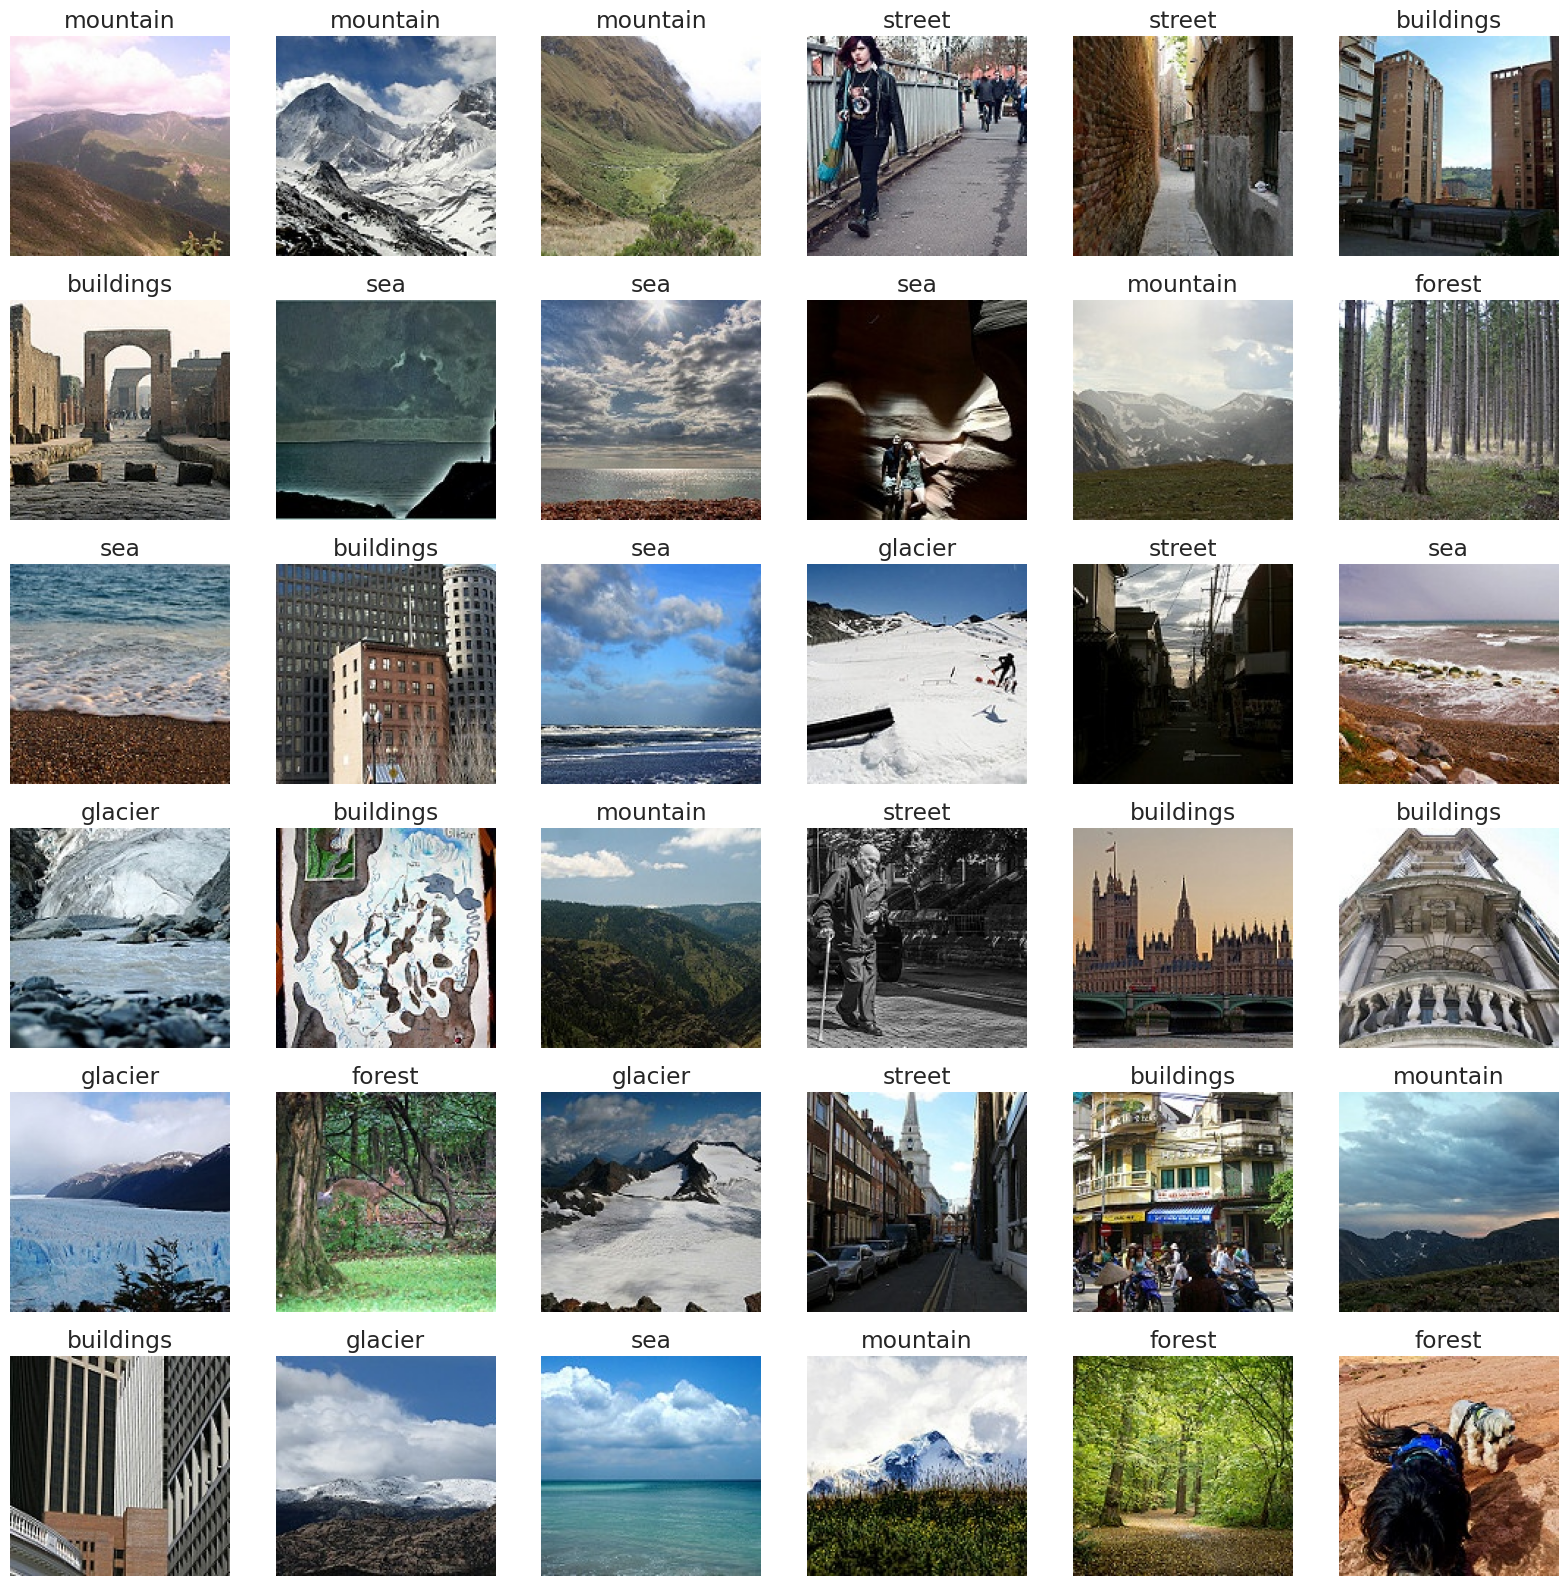

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [20]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [21]:
y_pred = KerasModel.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

labels = list(code.values())
target_names = list(code.keys())
report = classification_report(test_labels, y_pred_classes, labels=labels, target_names=target_names)

print(report)

report = classification_report(test_labels, y_pred_classes, labels=labels, target_names=target_names)

print(report)

precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_classes, labels=labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

   buildings       0.85      0.90      0.88       437
      forest       0.97      0.99      0.98       474
     glacier       0.86      0.82      0.84       553
    mountain       0.84      0.83      0.84       525
         sea       0.91      0.94      0.92       510
      street       0.93      0.88      0.90       501

    accuracy                           0.89      3000
   macro avg       0.89      0.90      0.89      3000
weighted avg       0.89      0.89      0.89      3000

              precision    recall  f1-score   support

   buildings       0.85      0.90      0.88       437
      forest       0.97      0.99      0.98       474
     glacier       0.86      0.82      0.84       553
    mountain       0.84      0.83      0.84       525
         sea       0.91      0.94      0.92       510
      street       0.93      0.88      0.90       501

    accuracy                          

In [27]:
KerasModel.save("/kaggle/working/best_model.h5")

# Ensemble learning using feature extraction from VGG16

In [56]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False)

In [57]:
train_features = base_model.predict(train_images)
test_features = base_model.predict(test_images)

439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


In [58]:
train_features.shape

(14034, 4, 4, 512)

In [59]:
train_size, x, y, z = train_features.shape
test_size, x, y, z = test_features.shape

In [60]:
# Ensemble Learning
np.random.seed(101)
n_estimators = 10
max_samples = 0.8

# Each estimator will train on a random subset of the training data with max_samples size
max_samples *= train_size
max_samples = int(max_samples)

In [61]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation= 'relu'),
                                    tf.keras.layers.Dense(6, activation='softmax')
                                ])
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    models.append(model)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
histories = []

for i in range(n_estimators):
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=20, validation_split = 0.1))

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7243 - loss: 0.7765 - val_accuracy: 0.8736 - val_loss: 0.3429
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.2622 - val_accuracy: 0.8985 - val_loss: 0.2806
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9462 - loss: 0.1749 - val_accuracy: 0.8976 - val_loss: 0.2973
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1438 - val_accuracy: 0.9163 - val_loss: 0.2631
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.1010 - val_accuracy: 0.9074 - val_loss: 0.2847
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0809 - val_accuracy: 0.9065 - val_loss: 0.2975
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0665 - val_accuracy: 0.9127 - val_loss: 0.3021
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0516 - val_accuracy: 0.9270 - val_loss

In [63]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8903333333333333


In [66]:
models

[<Sequential name=sequential_40, built=True>,
 <Sequential name=sequential_41, built=True>,
 <Sequential name=sequential_42, built=True>,
 <Sequential name=sequential_43, built=True>,
 <Sequential name=sequential_44, built=True>,
 <Sequential name=sequential_45, built=True>,
 <Sequential name=sequential_46, built=True>,
 <Sequential name=sequential_47, built=True>,
 <Sequential name=sequential_48, built=True>,
 <Sequential name=sequential_49, built=True>]

# Wrapper method to save the ensemble models

In [67]:
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models
        
    def call(self, x):
        predictions = [model(x) for model in self.models]
        return tf.reduce_mean(predictions, axis=0)

# Create and save the ensemble
ensemble = EnsembleModel(models)
ensemble.save('/kaggle/working/final_ensemble.h5')  # Saves architecture + weights